In [1]:
import numpy as np

In [2]:
n = 1000
averageArea = 100
areaDeviation = 20
num_of_rooms = [1,2,3,4]
probRoom = [0.2, 0.4, 0.3, 0.1]
location = ["local", "out_of_town"]
probLocation = [0.7, 0.3]

In [3]:
area = np.random.normal(averageArea, areaDeviation, (n,1))
room = np.random.choice(num_of_rooms, (n,1), p=probRoom)
location = np.random.choice(location, (n,1), p=probLocation)

In [4]:
coefficient = [0, 800, 10e3, 20e3]
error = np.random.normal(0, 3000, (n,1))
ones = np.ones((n,1))

In [5]:
x = np.concatenate((ones, area, room, location), axis=1)

In [6]:
x

array([['1.0', '88.6969160705715', '4', 'local'],
       ['1.0', '93.8700887280519', '2', 'local'],
       ['1.0', '91.15202494870218', '3', 'local'],
       ...,
       ['1.0', '119.8536569587244', '2', 'local'],
       ['1.0', '107.00697560192364', '2', 'out_of_town'],
       ['1.0', '68.62206018797', '2', 'local']], dtype='<U32')

In [7]:
x.shape

(1000, 4)

In [8]:
X = np.concatenate((ones, area, room, location=="local"), axis=1)
X

array([[  1.        ,  88.69691607,   4.        ,   1.        ],
       [  1.        ,  93.87008873,   2.        ,   1.        ],
       [  1.        ,  91.15202495,   3.        ,   1.        ],
       ...,
       [  1.        , 119.85365696,   2.        ,   1.        ],
       [  1.        , 107.0069756 ,   2.        ,   0.        ],
       [  1.        ,  68.62206019,   2.        ,   1.        ]])

In [9]:
B = np.array(coefficient).reshape(4,1)
B

array([[    0.],
       [  800.],
       [10000.],
       [20000.]])

In [10]:
y = X @ B + error

## Solution

In [11]:
##  x, y are given
## we should find the coefficients

In [12]:
x

array([['1.0', '88.6969160705715', '4', 'local'],
       ['1.0', '93.8700887280519', '2', 'local'],
       ['1.0', '91.15202494870218', '3', 'local'],
       ...,
       ['1.0', '119.8536569587244', '2', 'local'],
       ['1.0', '107.00697560192364', '2', 'out_of_town'],
       ['1.0', '68.62206018797', '2', 'local']], dtype='<U32')

In [14]:
x_processed = x.copy()

In [15]:
x_processed[:,3] = (x_processed[:,3]=="local").astype(float)

In [16]:
x_processed = x_processed.astype(float)
x_processed

array([[  1.        ,  88.69691607,   4.        ,   1.        ],
       [  1.        ,  93.87008873,   2.        ,   1.        ],
       [  1.        ,  91.15202495,   3.        ,   1.        ],
       ...,
       [  1.        , 119.85365696,   2.        ,   1.        ],
       [  1.        , 107.0069756 ,   2.        ,   0.        ],
       [  1.        ,  68.62206019,   2.        ,   1.        ]])

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regressor = LinearRegression()

In [19]:
regressor.fit(x_processed, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
regressor.score(x_processed, y)

0.9775411245351726

In [21]:
y_pred = regressor.predict(x_processed)

In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

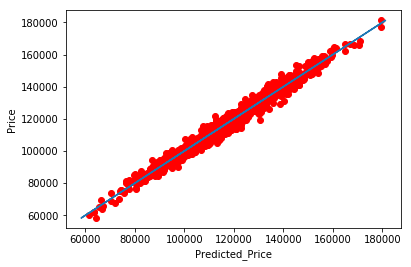

In [23]:
plt.scatter(y_pred, y, color="red")
plt.plot(y, y)
plt.xlabel("Predicted_Price")
plt.ylabel("Price")

(array([  1.,   6.,  29.,  99., 222., 287., 198., 119.,  29.,  10.]),
 array([-11564.60147247,  -9479.58527898,  -7394.56908548,  -5309.55289199,
         -3224.5366985 ,  -1139.52050501,    945.49568848,   3030.51188197,
          5115.52807546,   7200.54426895,   9285.56046245]),
 <a list of 10 Patch objects>)

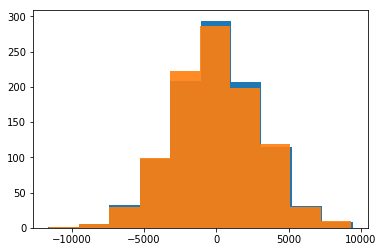

In [24]:
plt.hist(error)
plt.hist(y-y_pred, alpha=0.9)

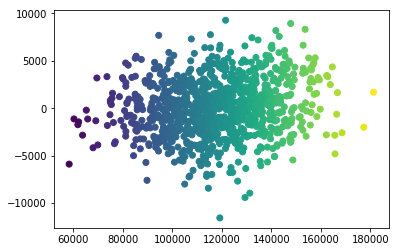

In [25]:
plt.scatter(y, y-y_pred, c=y) 

In [26]:
regressor.intercept_

array([516.69923973])

In [27]:
regressor.coef_

array([[    0.        ,   799.06164539,  9809.26914959, 20095.95487227]])

In [28]:
B

array([[    0.],
       [  800.],
       [10000.],
       [20000.]])

Text(0, 0.5, 'Number_Of_Rooms')

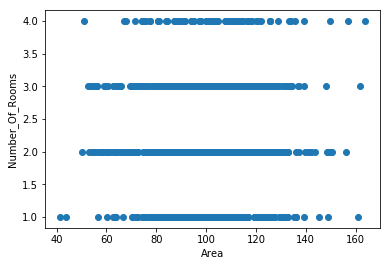

In [29]:
plt.scatter(x_processed[:,1], x_processed[:,2])
plt.xlabel("Area")
plt.ylabel("Number_Of_Rooms")

### Scenario 2

In [30]:
n = 1000
averageArea = 100
areaDeviation = 20
num_of_rooms = [1,2,3,4,5]

probRoom = [0.1, 0.4, 0.3, 0.1, 0.1]

room = np.random.choice(num_of_rooms, (n,1), p=probRoom)
area = room * 40 + np.random.normal(0, areaDeviation, (n,1))

coefficient = [0, 800, 10e3]
error = np.random.normal(0, 3000, (n,1))
ones = np.ones((n,1))

x = np.concatenate((ones, area, room), axis=1)

In [31]:
C=np.array(coefficient).reshape(3,1)
C

array([[    0.],
       [  800.],
       [10000.]])

In [32]:
y = x @ C + error

In [33]:
model = LinearRegression()

In [34]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
model.score(x, y)

0.9962904756782086

In [36]:
model.intercept_

array([-38.50396494])

In [37]:
model.coef_

array([[   0.        ,  804.52760262, 9866.74737155]])

Text(0, 0.5, 'Number_Of_Rooms')

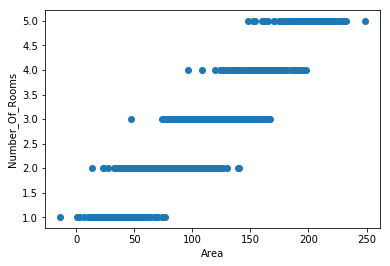

In [38]:
plt.scatter(x[:,1],x[:,2])
plt.xlabel("Area")
plt.ylabel("Number_Of_Rooms")



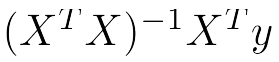

In [39]:
A = np.linalg.inv(x.T @ x) @ x.T @ y
A

array([[ -38.50396495],
       [ 804.52760262],
       [9866.74737155]])